In [13]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt

In [36]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
admit=pd.read_csv("../DS InternSavy/Mall_Customers.csv")
# Shape of dataset
admit.shape

(200, 5)

In [21]:
len(admit)

200

In [22]:
admit.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
admit.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
admit.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [25]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
admit.columns=admit.columns.str.replace(" ","")
admit.columns

Index(['CustomerID', 'Genre', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

In [27]:
# choosing int columns
int_col=admit.select_dtypes(include=["int64"]).columns.tolist()
int_col

['CustomerID', 'Age', 'AnnualIncome(k$)', 'SpendingScore(1-100)']

In [28]:
# choosing float columns
float_col=admit.select_dtypes(include=["float64"]).columns.tolist()
float_col

[]

In [29]:
# unique datatypes
admit.dtypes.value_counts()

int64     4
object    1
dtype: int64

In [30]:
#Unique values in dataframe
admit.nunique().sort_values(ascending=False)

CustomerID              200
SpendingScore(1-100)     84
AnnualIncome(k$)         64
Age                      51
Genre                     2
dtype: int64

In [31]:
# we don't have null values identified in info().Lets look again..
admit.isnull().sum()

CustomerID              0
Genre                   0
Age                     0
AnnualIncome(k$)        0
SpendingScore(1-100)    0
dtype: int64

In [32]:
# Descriptive Statistics
admit.describe()

,CustomerID,Age,AnnualIncome(k$),SpendingScore(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


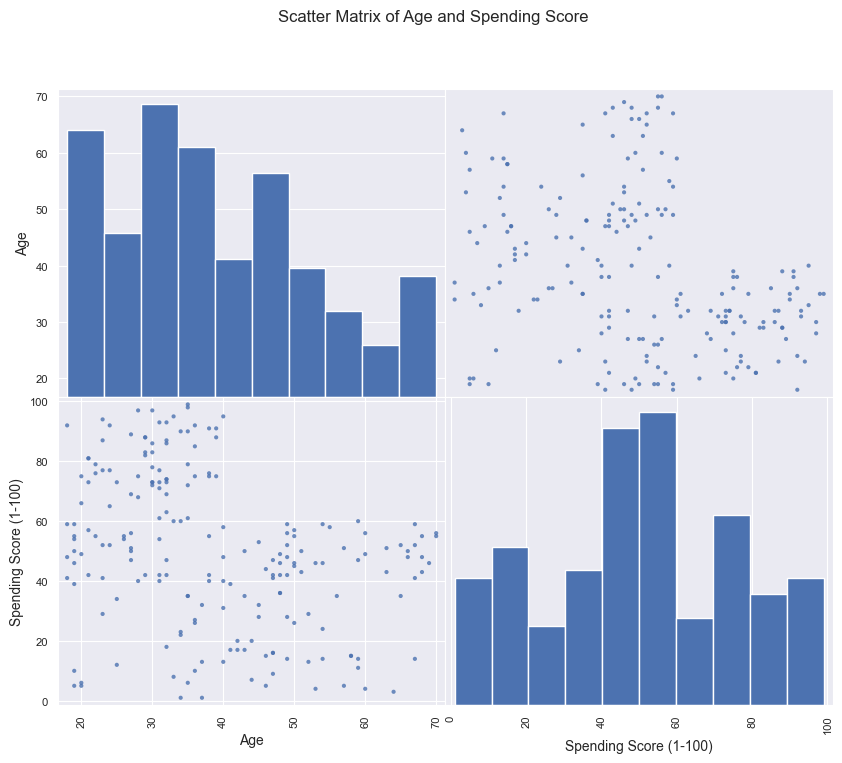

In [40]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Load the customer dataset from the CSV file
data = pd.read_csv('../DS InternSavy/MAll_Customers.csv')

# Selecting features for visualization
features = ['Age', 'Spending Score (1-100)']

# Create a scatter matrix
scatter_matrix(data[features], figsize=(10, 8), alpha=0.8, diagonal='hist')
plt.suptitle('Scatter Matrix of Age and Spending Score')
plt.show()


C:\Users\zunai\AppData\Local\Temp\ipykernel_12700\1540836082.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


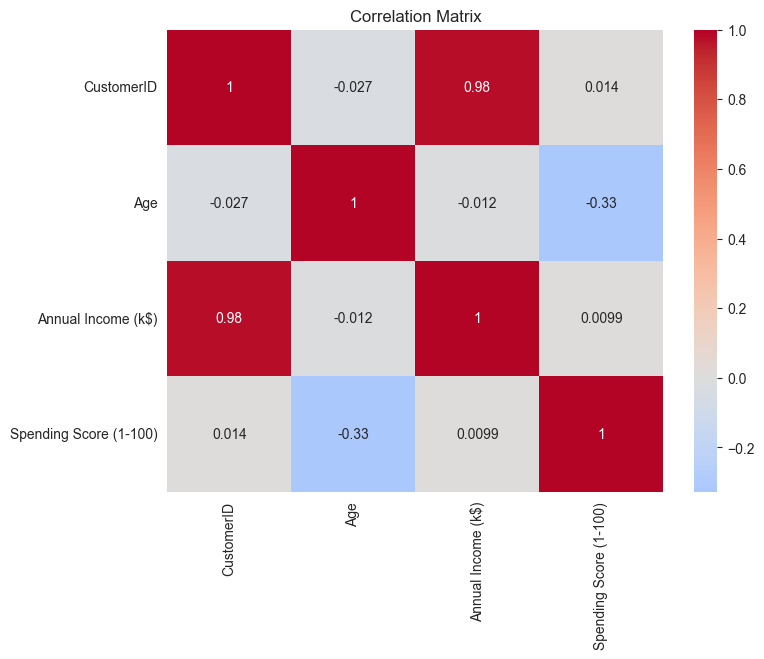

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the customer dataset from the CSV file
data = pd.read_csv('../DS InternSavy/Mall_Customers.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [42]:
import pandas as pd

# Load the customer dataset from the CSV file
data = pd.read_csv('../DS InternSavy/Mall_Customers.csv')

# Calculate the correlation matrix including only numeric columns
correlation_matrix = data.corr(numeric_only=True)

# Print the correlation matrix
print(correlation_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


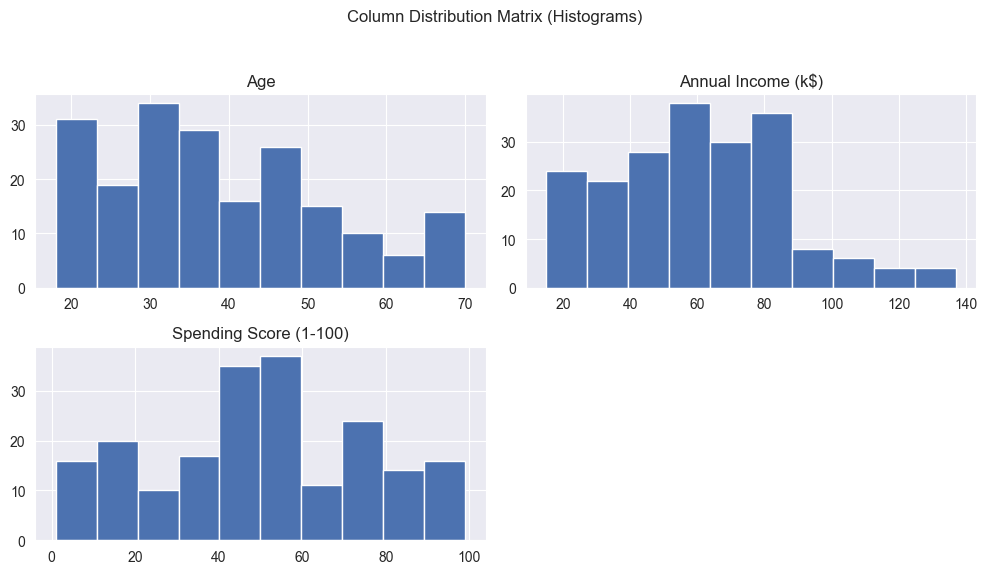

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the customer dataset from the CSV file
data = pd.read_csv('../DS InternSavy/Mall_Customers.csv')

# Select columns to visualize
columns_to_visualize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a distribution matrix using histograms
data[columns_to_visualize].hist(figsize=(10, 6))
plt.suptitle('Column Distribution Matrix (Histograms)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to prevent overlapping
plt.show()
